In [1]:
from controller import *

In [2]:
#impulse = make_impulse(truth[:1000], N=10, plot=True)

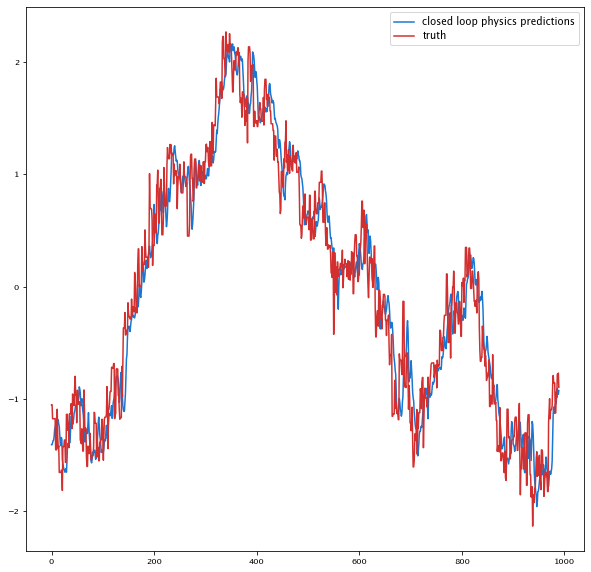

In [3]:
plt.figure(figsize=(10,10))
kalman.kfilter.state = np.flip(truth[1000:1010])
run, predict = kalman.kfilter.run(truth[1010:2000] + np.random.normal(0, 0.06, (990,)), save_physics=True)
#plt.plot(run, label = 'kfilter output')
plt.plot(predict, label='closed loop physics predictions')
kalman.kfilter.state = np.flip(truth[:10])
plt.plot(truth[1010:2000], label='truth')
plt.legend()

actions = predict

In [4]:
# just rewriting a Kalman control simulation inline here because something's not working

size = truth.size
state_size = kalman.kfilter.A.shape[0]
shifts = np.diff(truth)
actions = np.zeros(size)
state = np.flip(truth[:state_size])
residuals = np.zeros(size)
residuals[:state_size] = truth[:state_size]
predictions = np.zeros(size)
delay = 1
for i in range(state_size, size - 1):
    residuals[i] = residuals[i - 1] + actions[i] + shifts[i - 1]
    # kalman.kfilter.update()
    actions[i + delay] = kalman.strategy(residuals[i] - actions[i])
    
plt.plot(residuals + actions, label='openloop?')
plt.plot(truth)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in add


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x110eca950> (for post_execute):


/usr/local/lib/python3.7/site-packages/matplotlib/ticker.py:2036: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/usr/local/lib/python3.7/site-packages/matplotlib/ticker.py:2069: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 432x288 with 1 Axes>

Starting at timestep 10


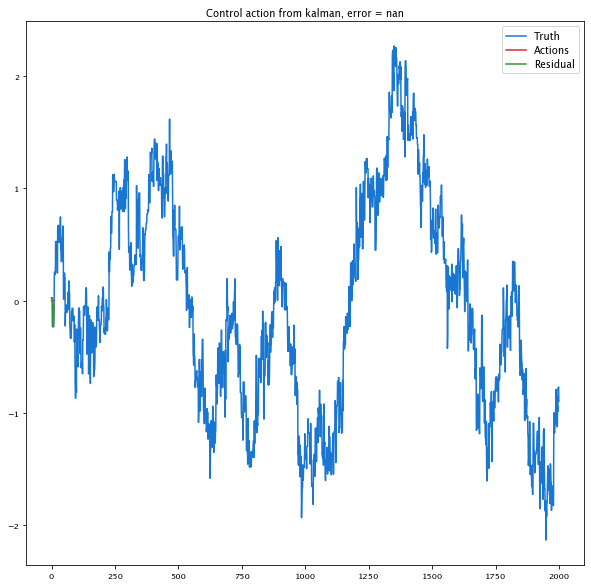

In [5]:
show_control('kalman')

In [6]:
kalman.kfilter.K

array([[ 9.96415594e-01],
       [-9.48478578e-05],
       [ 1.36791276e-04],
       [ 5.30634771e-05],
       [ 1.40676783e-04],
       [ 1.77413307e-04],
       [ 2.25535880e-04],
       [ 4.03078451e-04],
       [ 4.50309974e-04],
       [ 1.06717556e-03]])